[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/da-python/python-for-data-analytics/blob/main/Lesson4/hometask/Cluster.ipynb)

# Задание

### Основная часть

* Проанализируйте и опишите данный датасет, используя все возможные графики из тех, что были на уроке Matplotlib, Seaborn, Plotly
* Используйте также описательные статистики
* У каждого построенного графика должен быть соответствующий вывод, который описывает наблюдение или инсайт

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')

display(df.head(10)) 
df.info()

age gender city_type  full_mob  ml_balance  cl_balance_0m  loan_balance_0m  \
0   71    NaN      <100       103         0.0            0.0             0.00   
1   49    NaN      Mega        81         0.0            0.0             0.00   
2   56    NaN      Mega        81         0.0            0.0             0.00   
3   47    NaN      Mega        81         0.0            0.0             0.00   
4   74    NaN      Mega        81         0.0            0.0             0.00   
5   72      М      Mega        50         0.0            0.0             0.00   
6   46    NaN      <100        81         0.0            0.0             0.00   
7   62    NaN      <100        56         0.0            0.0             0.00   
8   39    NaN   100-500        13         0.0            0.0             0.00   
9   36      М      <100       154         0.0            0.0         32413.52   

   td_balance_0m  casa_balance_0m  dc_trx_cnt  ...  min_loan_balance_1q  \
0            0.0     0.000000e+00           0  ...                 0.00   
1            0.0     3.272937e+03           0  ...                 0.00   
2            0.0     6.249755e+03           6  ...                 0.00   
3            0.0     1.435494e+04           0  ...                 0.00   
4            0.0     9.151177e+04           0  ...                 0.00   
5            0.0     9.369080e+04           0  ...                 0.00   
6            0.0     5.350795e+03           0  ...                 0.00   
7            0.0     4.783591e+04           0  ...                 0.00   
8            0.0     2.919013e+06           0  ...                 0.00   
9            0.0     0.000000e+00          83  ...             32413.52   

   max_loan_balance_1q  avg_loan_balance_1Y  min_cl_balance_1q  \
0                 0.00             0.000000                0.0   
1                 0.00             0.000000                0.0   
2                 0.00             0.000000                0.0   
3                 0.00             0.000000                0.0   
4                 0.00             0.000000                0.0   
5                 0.00             0.000000                0.0   
6                 0.00             0.000000                0.0   
7                 0.00             0.000000                0.0   
8                 0.00             0.000000                0.0   
9             34119.49         38051.374167                0.0   

   max_cl_balance_1q  avg_cl_balance_1Y  loan_to_deposit      Avg_trx  \
0                0.0                0.0              NaN          NaN   
1                0.0                0.0              NaN          NaN   
2                0.0                0.0              NaN   854.670000   
3                0.0                0.0              NaN          NaN   
4                0.0                0.0              NaN          NaN   
5                0.0                0.0              NaN          NaN   
6                0.0                0.0              NaN          NaN   
7                0.0                0.0              NaN          NaN   
8                0.0                0.0              NaN          NaN   
9                0.0                0.0              NaN  3915.032892   

   avgtrx_to_balance           nbi  
0                NaN           NaN  
1                NaN     28.762952  
2           0.083467   1973.335539  
3                NaN    364.008556  
4                NaN   6651.416562  
5                NaN   2433.644326  
6                NaN    177.408546  
7                NaN   1284.357885  
8                NaN  17397.286761  
9           4.383411   6065.052515  

[10 rows x 28 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

In [3]:
#Проверим наличие дубликатов и удалим их
df.duplicated().sum()
df_new=df.drop_duplicates().reset_index()
df_new

index  age gender city_type  full_mob  ml_balance  cl_balance_0m  \
0          0   71    NaN      <100       103         0.0            0.0   
1          1   49    NaN      Mega        81         0.0            0.0   
2          2   56    NaN      Mega        81         0.0            0.0   
3          3   47    NaN      Mega        81         0.0            0.0   
4          4   74    NaN      Mega        81         0.0            0.0   
...      ...  ...    ...       ...       ...         ...            ...   
49969  49995   57      F      <100        97         0.0            0.0   
49970  49996   58      F      Mega        34         0.0            0.0   
49971  49997   34      М       1M+        21         0.0            0.0   
49972  49998   43      М      <100        52         0.0            0.0   
49973  49999   32      F      <100         5         0.0            0.0   

       loan_balance_0m  td_balance_0m  casa_balance_0m  ...  \
0                 0.00            0.0           0.0000  ...   
1                 0.00            0.0        3272.9367  ...   
2                 0.00            0.0        6249.7550  ...   
3                 0.00            0.0       14354.9370  ...   
4                 0.00            0.0       91511.7691  ...   
...                ...            ...              ...  ...   
49969             0.00      1247018.0           0.8800  ...   
49970             0.00      1000000.0           0.0000  ...   
49971             0.00            0.0        6450.9300  ...   
49972         39318.52            0.0        4101.1200  ...   
49973             0.00            0.0         389.4100  ...   

       min_loan_balance_1q  max_loan_balance_1q  avg_loan_balance_1Y  \
0                     0.00                 0.00             0.000000   
1                     0.00                 0.00             0.000000   
2                     0.00                 0.00             0.000000   
3                     0.00                 0.00             0.000000   
4                     0.00                 0.00             0.000000   
...                    ...                  ...                  ...   
49969                 0.00                 0.00             0.000000   
49970                 0.00                 0.00             0.000000   
49971                 0.00                 0.00             0.000000   
49972             39318.52             48453.57         63442.406667   
49973                 0.00                 0.00             0.000000   

       min_cl_balance_1q  max_cl_balance_1q  avg_cl_balance_1Y  \
0                    0.0                0.0                0.0   
1                    0.0                0.0                0.0   
2                    0.0                0.0                0.0   
3                    0.0                0.0                0.0   
4                    0.0                0.0                0.0   
...                  ...                ...                ...   
49969                0.0                0.0                0.0   
49970                0.0                0.0                0.0   
49971                0.0                0.0                0.0   
49972                0.0                0.0                0.0   
49973                0.0                0.0                0.0   

       loan_to_deposit      Avg_trx  avgtrx_to_balance           nbi  
0                  NaN          NaN                NaN           NaN  
1                  NaN          NaN                NaN     28.762952  
2                  NaN   854.670000           0.083467   1973.335539  
3                  NaN          NaN                NaN    364.008556  
4                  NaN          NaN                NaN   6651.416562  
...                ...          ...                ...           ...  
49969              0.0          NaN                NaN  13775.933155  
49970              0.0          NaN                NaN   8247.466438  
49971              NaN  1621.347671           0.1799

In [4]:
#Проверим наличие пропусков в таблице
pd.DataFrame(round((df_new.isna().mean()*100),2)).style.background_gradient('Blues')

Вывод: в поле gender - 723 нулевых значения, удалим эти строки, так как пропуски составляют менее 1,5% от датафрейма. nbi заполним медианным занчением, так как разброс достаточно большой. loan_to_deposit - 92,36% пропусков, этот столбец и Avg_trxб,avgtrx_to_balance не будем трогать,  так как количество пропусков существенно больше 10% и удаление исказит результаты анализа. Дадим рекомендацию разработчикам, что нужно исправить выгрузку и порядок сбра информации. 

In [5]:
df_new.dropna(subset=['gender'], inplace=True)
median = df_new['nbi'].median()
df_new['nbi']=df_new['nbi'].fillna(median)
df_new

index  age gender city_type  full_mob  ml_balance  cl_balance_0m  \
5          5   72      М      Mega        50         0.0            0.0   
9          9   36      М      <100       154         0.0            0.0   
10        10   56      F      <100       165         0.0            0.0   
11        11   19      М   100-500        40         0.0            0.0   
12        12   20      F       1M+         3         0.0            0.0   
...      ...  ...    ...       ...       ...         ...            ...   
49969  49995   57      F      <100        97         0.0            0.0   
49970  49996   58      F      Mega        34         0.0            0.0   
49971  49997   34      М       1M+        21         0.0            0.0   
49972  49998   43      М      <100        52         0.0            0.0   
49973  49999   32      F      <100         5         0.0            0.0   

       loan_balance_0m  td_balance_0m  casa_balance_0m  ...  \
5                 0.00            0.0        93690.801  ...   
9             32413.52            0.0            0.000  ...   
10            61189.99        70000.0         1524.580  ...   
11                0.00            0.0           19.650  ...   
12                0.00            0.0        10338.170  ...   
...                ...            ...              ...  ...   
49969             0.00      1247018.0            0.880  ...   
49970             0.00      1000000.0            0.000  ...   
49971             0.00            0.0         6450.930  ...   
49972         39318.52            0.0         4101.120  ...   
49973             0.00            0.0          389.410  ...   

       min_loan_balance_1q  max_loan_balance_1q  avg_loan_balance_1Y  \
5                     0.00                 0.00             0.000000   
9                 32413.52             34119.49         38051.374167   
10                44360.86             61189.99         43218.413333   
11                    0.00                 0.00             0.000000   
12                    0.00                 0.00             0.000000   
...                    ...                  ...                  ...   
49969                 0.00                 0.00             0.000000   
49970                 0.00                 0.00             0.000000   
49971                 0.00                 0.00             0.000000   
49972             39318.52             48453.57         63442.406667   
49973                 0.00                 0.00             0.000000   

       min_cl_balance_1q  max_cl_balance_1q  avg_cl_balance_1Y  \
5                    0.0                0.0                0.0   
9                    0.0                0.0                0.0   
10                   0.0                0.0                0.0   
11                   0.0                0.0                0.0   
12                   0.0                0.0                0.0   
...                  ...                ...                ...   
49969                0.0                0.0                0.0   
49970                0.0                0.0                0.0   
49971                0.0                0.0                0.0   
49972                0.0                0.0                0.0   
49973                0.0                0.0                0.0   

       loan_to_deposit      Avg_trx  avgtrx_to_balance           nbi  
5                  NaN          NaN                NaN   2433.644326  
9                  NaN  3915.032892           4.383411   6065.052515  
10            0.617406  1323.992698           0.226536   8009.940315  
11                 NaN   215.688611           0.992718    684.233442  
12                 NaN  1202.188857           0.063129    157.694118  
...                ...          ...                ...           ...  
49969         0.000000          NaN                NaN  13775.933155  
49970         0.000000          NaN                NaN   8247.466438  
49971              NaN  1621.347671           0.1799

In [6]:
df_new.describe()

index           age      full_mob    ml_balance  cl_balance_0m  \
count  49251.000000  49251.000000  49251.000000  4.925100e+04   4.925100e+04   
mean   25006.564983     41.621612     54.081420  1.302064e+04   6.075528e+04   
std    14410.390366     12.845649     47.490022  1.886962e+05   1.993646e+05   
min        5.000000      4.000000      0.000000  0.000000e+00   0.000000e+00   
25%    12539.500000     32.000000     14.000000  0.000000e+00   0.000000e+00   
50%    24991.000000     40.000000     38.000000  0.000000e+00   0.000000e+00   
75%    37479.500000     51.000000     81.000000  0.000000e+00   0.000000e+00   
max    49999.000000     98.000000    236.000000  1.467568e+07   3.421262e+06   

       loan_balance_0m  td_balance_0m  casa_balance_0m    dc_trx_cnt  \
count     4.925100e+04   4.925100e+04     4.925100e+04  49251.000000   
mean      8.188526e+04   7.021919e+04     6.751808e+04    105.199691   
std       2.850323e+05   1.690208e+06     1.759773e+06    192.319958   
min       0.000000e+00   0.000000e+00     0.000000e+00      0.000000   
25%       0.000000e+00   0.000000e+00     3.337000e+01      0.000000   
50%       0.000000e+00   0.000000e+00     7.482000e+02     14.000000   
75%       0.000000e+00   0.000000e+00     8.629050e+03    123.000000   
max       1.467568e+07   3.305000e+08     2.474474e+08   2970.000000   

         dc_trx_sum  ...  min_loan_balance_1q  max_loan_balance_1q  \
count  4.925100e+04  ...         4.925100e+04         4.925100e+04   
mean   2.191242e+05  ...         7.593495e+04         8.943968e+04   
std    5.897129e+05  ...         2.755610e+05         2.994882e+05   
min    0.000000e+00  ...         0.000000e+00         0.000000e+00   
25%    0.000000e+00  ...         0.000000e+00         0.000000e+00   
50%    3.420545e+04  ...         0.000000e+00         0.000000e+00   
75%    2.608792e+05  ...         0.000000e+00         0.000000e+00   
max    3.634105e+07  ...         1.467568e+07         1.481199e+07   

       avg_loan_balance_1Y  min_cl_balance_1q  max_cl_balance_1q  \
count         4.925100e+04       4.925100e+04       4.925100e+04   
mean          7.961876e+04       5.596076e+04       6.556490e+04   
std           2.755971e+05       1.882403e+05       2.089692e+05   
min           0.000000e+00       0.000000e+00       0.000000e+00   
25%           0.000000e+00       0.000000e+00       0.000000e+00   
50%           0.000000e+00       0.000000e+00       0.000000e+00   
75%           5.327228e+03       0.000000e+00       0.000000e+00   
max           1.502391e+07       3.421262e+06       3.684066e+06   

       avg_cl_balance_1Y  loan_to_deposit       Avg_trx  avgtrx_to_balance  \
count       4.925100e+04      3791.000000  3.155700e+04       3.094800e+04   
mean        5.582906e+04        18.376063  5.184263e+03       3.351975e+02   
std         1.724718e+05       270.352710  1.581875e+04       2.959425e+04   
min         0.000000e+00         0.000000  0.000000e+00       0.000000e+00   
25%         0.000000e+00         0.000000  8.102005e+02       8.003262e-02   
50%         0.000000e+00         0.000000  1.701549e+03       2.987259e-01   
75%         0.000000e+00         0.000000  4.361875e+03       1.508440e+00   
max         4.112823e+06     12521.279170  1.749500e+06       5.000000e+06   

                nbi  
count  4.925100e+04  
mean   1.155136e+04  
std    4.442602e+04  
min    1.684957e-04  
25%    2.979849e+02  
50%    1.390097e+03  
75%    8.917261e+03  
max    4.691796e+06  

[8 rows x 27 columns]

Вывод: средний возраст пользователя 41 год, мин -4 года, максимум- 98 лет. По длительности взаимоотношения с банком  - средняя продолжительность 54 мес, максимально - 236. Итересно посмотреть графически эти распределения.

In [7]:
#Найдем общее количество городов  по типу
df_new['city_type'].value_counts()

<100        15196
100-500     10658
Mega         8630
1M+          7844
500-1000     6923
Name: city_type, dtype: int64

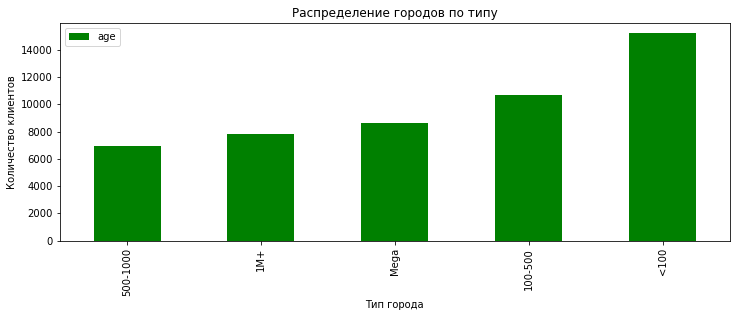

In [8]:
df_new.groupby('city_type').agg({'age':'count'}).sort_values(by = 'age').plot(kind='bar', figsize = (12,4), color = 'green')
plt.title('Распределение городов по типу')
plt.xlabel("Тип города")
plt.ylabel("Количество клиентов")
plt.xticks(rotation=90)
plt.show()

Вывод: наибольшее число клиентов из городов с численностью населения менее 100 тыс человек (примерно 1/3), наименьшее количество клиентов из городов 100-500

In [9]:
df_new['gender'].value_counts()

М    25388
F    23863
Name: gender, dtype: int64

In [10]:
colors = ['green','greenyellow']

name_rest = [
    'Мужчины',
    'Женщины',
]
values = [25388, 23863]

fig = go.Figure(data=[go.Pie(labels=name_rest,
                             values=values, pull=[0, 0.2], title='Соотношение клиентов по полу')])
fig.update_traces( textfont_size=10,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1)))
fig.show()

Вывод: соотношение клиентов по полу практически одинаковое.Мужчин на 3% больше, чем женщин.

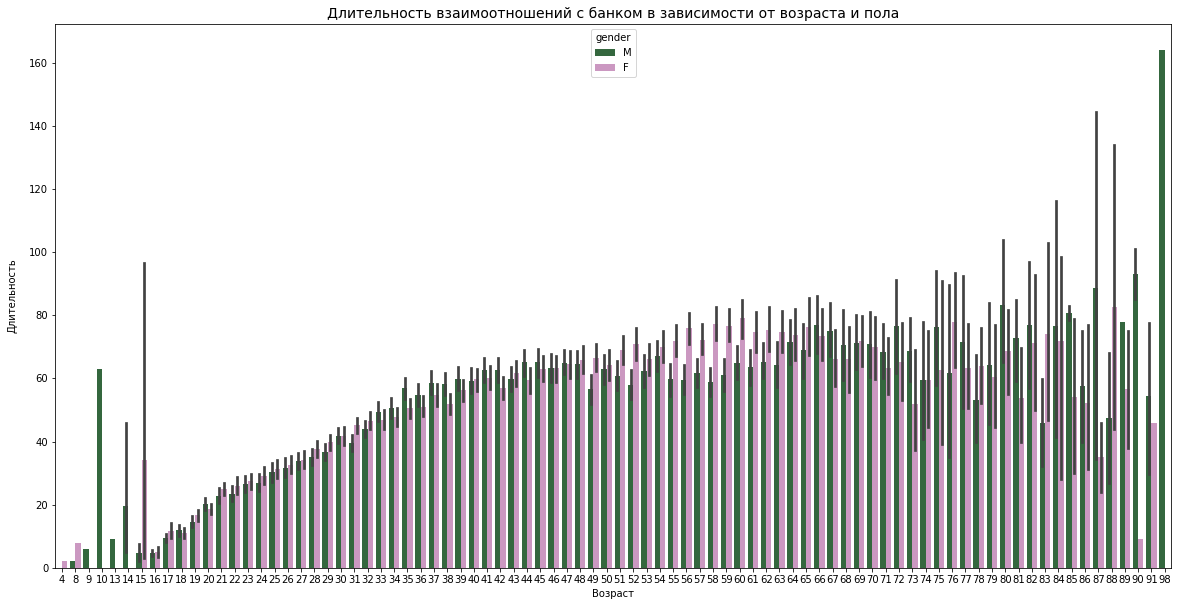

In [11]:
plt.figure(figsize=(20, 10))
sns.barplot(x="age",y="full_mob", hue="gender", data=df_new, palette='cubehelix') 
plt.title("Длительность взаимоотношений с банком в зависимости от возраста и пола", fontsize=14)
plt.ylabel("Длительность", labelpad=12)
plt.xlabel("Возраст")
plt.show();

Вывод: видно, что длительность взаимодействия растет с увеличением возраста клиентов, причем равномерно как у мужчин, так и у женщин. С 16 до 48 лет, примерно пропорции по полу одинаковые, с 49 до  63 женщины лидируют, а с 64 и до98 лидируют мужчины по длительности взаимодействия с банком. Также видны отдельные анамалии по возрасту, для его анализа построим боксплот

<AxesSubplot:xlabel='full_mob', ylabel='gender'>

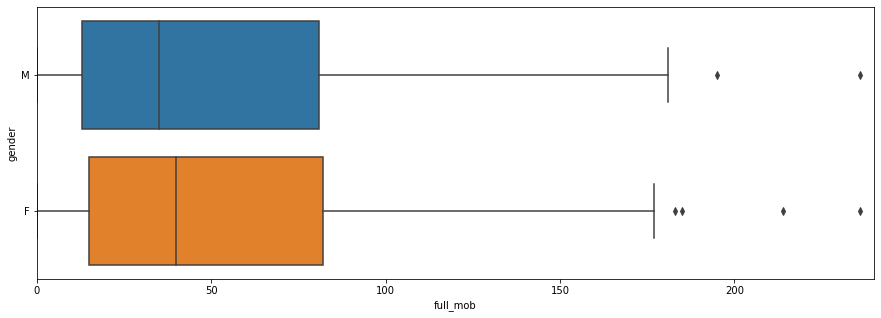

In [12]:
plt.figure(figsize=(15, 5))
plt.xlim([0, 240])
sns.boxplot(data=df_new, x= 'full_mob', y = 'gender')

<AxesSubplot:xlabel='age', ylabel='gender'>

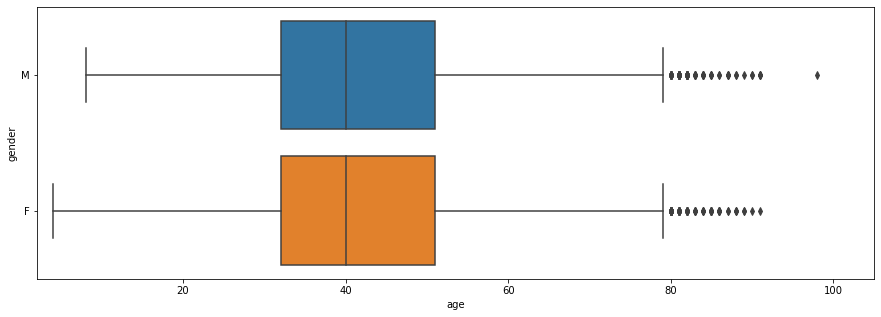

In [13]:
plt.figure(figsize=(15, 5))
plt.xlim([2, 105])
sns.boxplot(data=df_new, x= 'age', y = 'gender')

Вывод: по графикам видим, что среднее время взаимодействия клиента с банком в зависимости от пола практически одинаковое (35-40 недель)Б есть небольшие выбросы по обоим полам. Что касается возраста и пола, то такженаблюдается одинковая картина по мужчинам и женщинам, 40 лет средний возраст клиента, наибольшее число клиентов в возрасте от 30 до 50 лет, после 80 лет, скоре исключение , чем правило. 

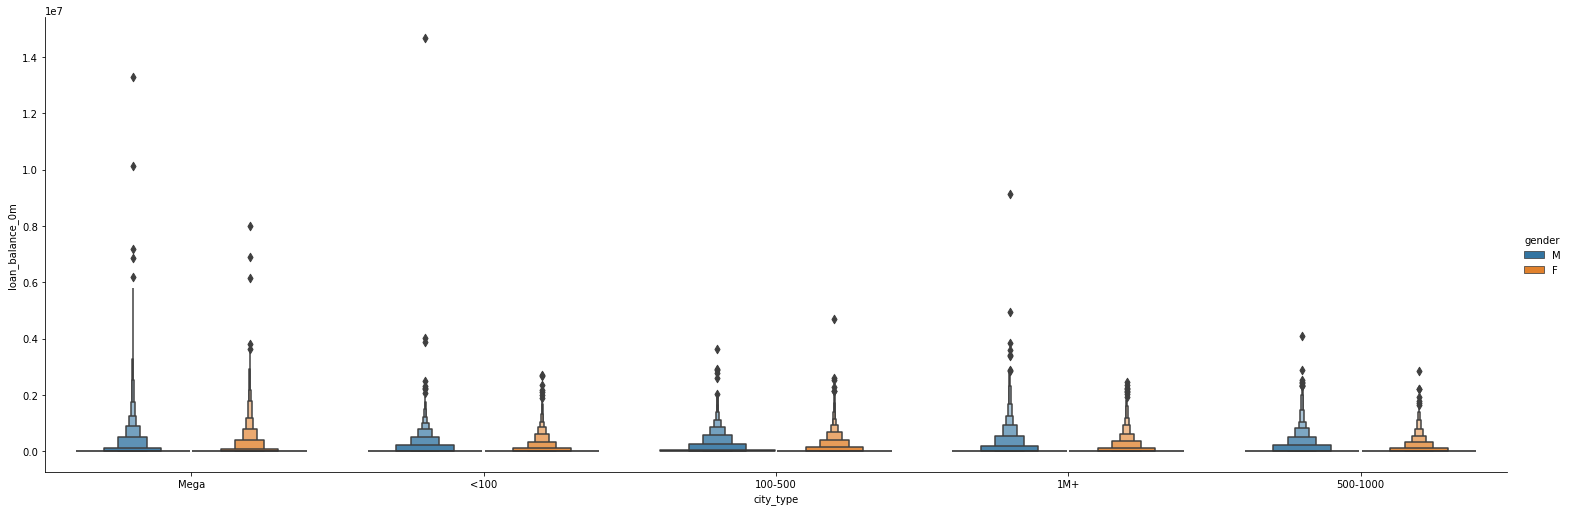

In [14]:
sns.catplot(
    x='city_type',
    y='loan_balance_0m',
    data=df_new,
    kind='boxen',
    hue='gender',
    height=7, 
    aspect=3);

Вывод: Мега города и города миллионники существенно отличаются в большую сторону от остальных по сумме кредитов, распределение же среди мужчин и женщин практически одинаковое.

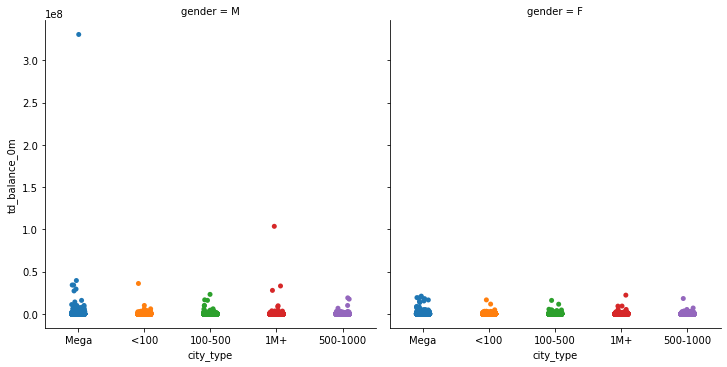

In [15]:
g = sns.catplot(x="city_type", y="td_balance_0m",
                col="gender", data=df_new)

Вывод: Суммы депозитов практически не отличаются в зависимости от города и пола, бросается в глаза только несколь высоких значений сумм депозитов у мужчин по городу Мега.

In [16]:
fig = px.scatter(df_new, x="dc_trx_cnt", y="dc_trx_sum", color='gender')
fig.update_layout(title="Распределение трат по картам",
                  xaxis_title="количество трат по картам",
                  yaxis_title="сумма трат по картам",
                  )

fig.show()


Вывод: распредение суммы трат по картам и количетсва показывают, что женщины совершают много покупок на низкие суммы, в тоже время мужчины тратят суммы больше, но покупок делают меньше

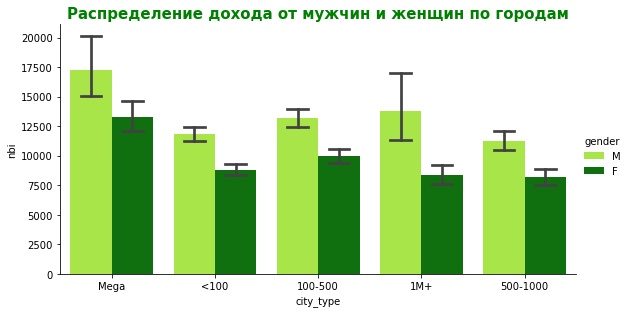

In [17]:
sns.catplot(
    x='city_type', 
    y='nbi', 
    data=df_new, 
    kind='bar', 
    hue='gender', 
    palette={"F": "green", "М": "greenyellow"},
    capsize=0.2, 
    height=4, 
    aspect=2); 

plt.title('Распределение дохода от мужчин и женщин по городам',
          size=15, 
          color='g', 
          weight='bold');

Вывод: доход в мега больше относительно других городов, также общая тенденция, что доходы от мужчин преышают доходы от женщин

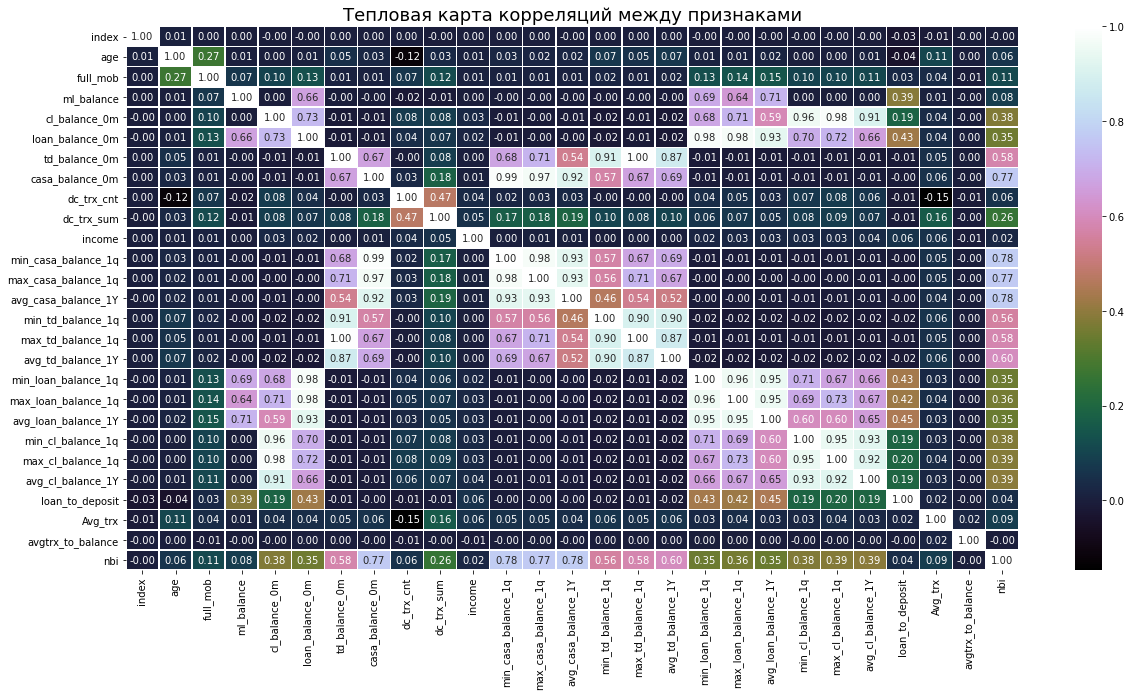

In [18]:
# построим матрицу корреляций
cm = df_new.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot = True, fmt = '0.2f', linewidths=.5, cmap='cubehelix')
plt.title('Тепловая карта корреляций между признаками', fontsize=18)
plt.show()

Вывод: по графику корреляций видно, что различного рода балансы хорошо корреклируют друг с другом, это и логично. 